O objetivo desse exercício é criar uma rede MLP construinndo um modelo sequencial para fazer a classificação do dataset do spotify.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.layers import Dropout

import pydot

###Carga do Dataset

In [2]:
url = 'https://telescopeinstorage.blob.core.windows.net/datasets/DadosSpotify.csv'
dataset = pd.read_csv(url, engine='python')
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
dataset.shape

(2017, 17)

###Pré-processamento

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [5]:
# Normalização do conjunto
X=dataset.drop(['target','song_title','artist'],axis=1)
y=dataset['target']
X=StandardScaler().fit_transform(X)


In [6]:
#Separação do Conjunto de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [7]:
X_train.shape

(1411, 14)

In [8]:
X_test.shape

(606, 14)

###Classificação

In [9]:
#Modelo da Rede MLP

model_spot = Sequential()
model_spot.add(Dense(16, input_dim = X_train.shape[1], activation='relu'))
model_spot.add(Dropout(0.2))
model_spot.add(Dense(8, activation='relu'))
model_spot.add(Dropout(0.2))
model_spot.add(Dense(1, activation = 'sigmoid'))

In [10]:
model_spot.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/100
21/21 [==============================] - 2s 4ms/step - loss: 0.7107 - accuracy: 0.5549
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.6052
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.6690
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5923 - accuracy: 0.6967
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5311 - accuracy: 0.7512
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4962 - accuracy: 0.7796
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4723 - accuracy: 0.7803
Epoch 8/100
21/21 [==============================] - 0s 8ms/step - loss: 0.4390 - accuracy: 0.8101
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8335
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8448
Epoch 11/

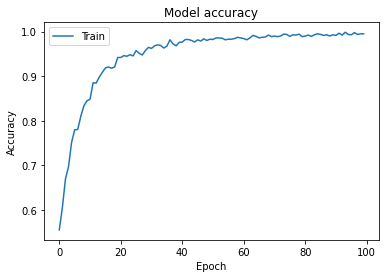

In [11]:
#Processo de treinamento com 70% dos dados
h = model_spot.fit(X_train, y_train, epochs=100, batch_size=70)
plt.plot(h.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
y_pred = model_spot.predict(X_test)
print(y_pred)


[[9.99996662e-01]
 [2.68596292e-01]
 [1.00000000e+00]
 [1.95481971e-05]
 [8.93766701e-05]
 [9.99987602e-01]
 [9.99915719e-01]
 [9.99999881e-01]
 [1.08855138e-05]
 [3.29307337e-09]
 [5.24746829e-05]
 [9.96928930e-01]
 [6.11214500e-06]
 [9.99979377e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99035239e-01]
 [1.00000000e+00]
 [3.70381226e-11]
 [1.00000000e+00]
 [9.95343208e-01]
 [1.00000000e+00]
 [2.98697302e-07]
 [1.00000000e+00]
 [5.06079197e-03]
 [9.80143788e-09]
 [2.02912109e-09]
 [3.63290310e-03]
 [1.00000000e+00]
 [3.79770994e-04]
 [3.02582979e-04]
 [9.98699725e-01]
 [1.25600375e-09]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99963224e-01]
 [6.43154507e-09]
 [8.84730553e-11]
 [4.54396009e-04]
 [3.84664827e-06]
 [9.96145129e-01]
 [9.99999821e-01]
 [9.95373607e-01]
 [1.00000000e+00]
 [2.33599221e-05]
 [9.98852253e-01]
 [9.99999464e-01]
 [2.23785639e-04]
 [3.61753773e-05]
 [9.93867815e-01]
 [9.93365526e-01]
 [9.99911785e-01]
 [1.00000000e+00]
 [6.30440700e-05]
 [4.54161198e-09]
 [1.804620

In [13]:
y_pred_classes = (y_pred > 0.5)

In [14]:
scores = model_spot.evaluate(X_test,y_test)
print(scores)

19/19 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 0.9934
[0.015811724588274956, 0.9933993220329285]


In [15]:
accuracy_score(y_true=y_test,y_pred=y_pred_classes)


0.9933993399339934